In [1]:
import numpy
from etrade.spot.forecast.plan_a.simulator import MarketSimulator
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.yieldindex import zero_quantile
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution, eps
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE, js_divergence_continuous

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot
import json

In [2]:
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (1, 10), (1, 8)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 8)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 8)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    "real_market": 1000,
    "noise_weight": 0,
    "market_len": 1,
    "kernel_num": None
}
s = Station("station", 50)
br = PointwiseRecycle(0.5, 1.05)

In [3]:
ms = MarketSimulator(**init_kwargs)

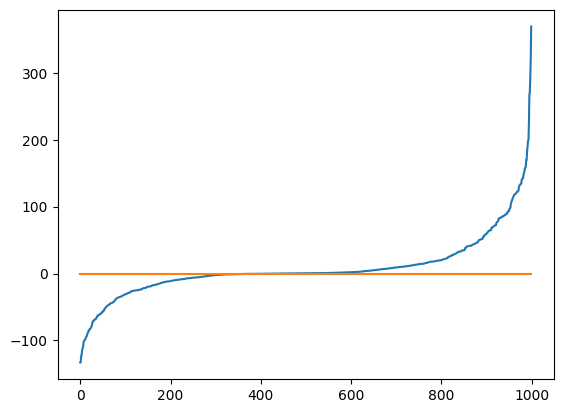

In [4]:
a, b = ms.optimized_trade(s, br)
pyplot.plot(numpy.sort(a-b))
pyplot.plot([0] * len(a))

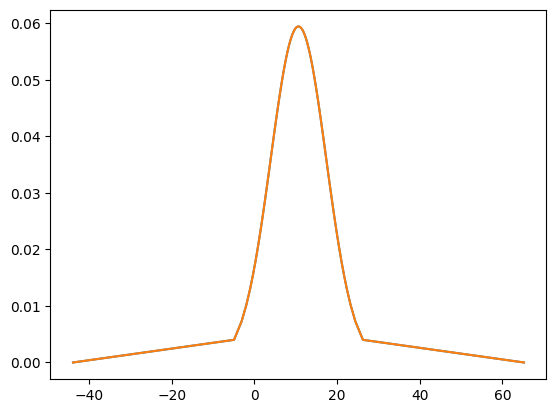

In [5]:
ppf, pdf, cdf = ms.real_market.power_generation.distributions[0].curves()
ppf1, pdf1, cdf1 = ms.predicted_market.power_generation.distributions[0].curves()
pyplot.plot(pdf[:,0], pdf[:,1])
pyplot.plot(pdf1[:,0], pdf1[:,1])

In [6]:
ms.predicted_market.price_kl_divergence()

array([[0.74120392]])

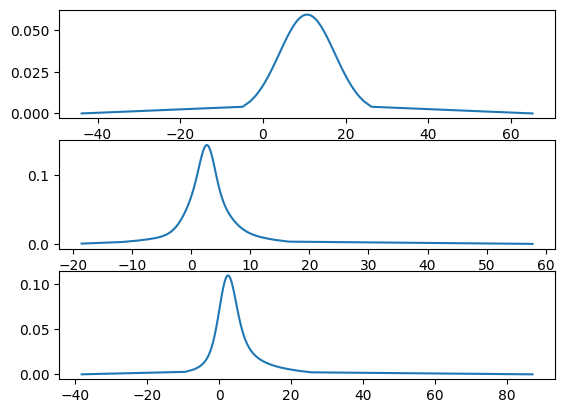

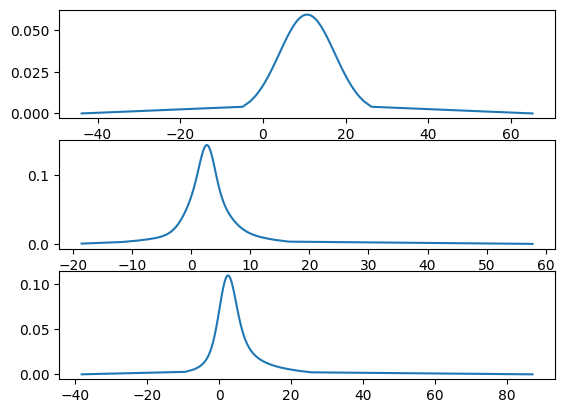

In [7]:
ms.real_market.plot()
ms.predicted_market.plot()

In [8]:
ms.predicted_market.pdf_difference()

[0.7412039176989997]